## Import Libraries

In [1]:
# Importing the libraries, fill the import name libraries below
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

#Import keras libraries that you need
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

# EDA

In [16]:
# Some functions to help out with this code
def prediction_plot(test,predicted):
    plt.plot(test, color='red',label='Real AMZN Stock Price')
    plt.plot(predicted, color='blue',label=' AMZN Predicted  Stock Price')
    plt.title('AMZN Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('AMZN Stock Price')
    plt.legend()
    plt.show()
    #fill the function to predict

def rmse_eval(test,predicted):
    rmse = math.sqrt(mean_squared_error(test,predicted))
    print("The root mean squared error is {}.".format(rmse))
    #fill the function for evaluation model



In [3]:
# Import Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/tianiums/Data-Set/main/AMZN_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date']) #import dataset based on your directory

In [4]:
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [ ]:
#dataset['Date'] = pd.to_datetime(dataset['Date']) #tidak diubah dulu

In [6]:
#dataset.info()

In [7]:
dataset.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN
2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN
2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN
2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,AMZN
2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN


In [8]:
# Checking for missing values, choose for data training and set in kind of year
#a : until year training
#b : year for testing
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [12]:
#mencari data na
dataset.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [13]:
#dataset = dataset.dropna() #tidak ada na

In [10]:
#dataset.isna().sum()

In [13]:
#mencari data null
dataset.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

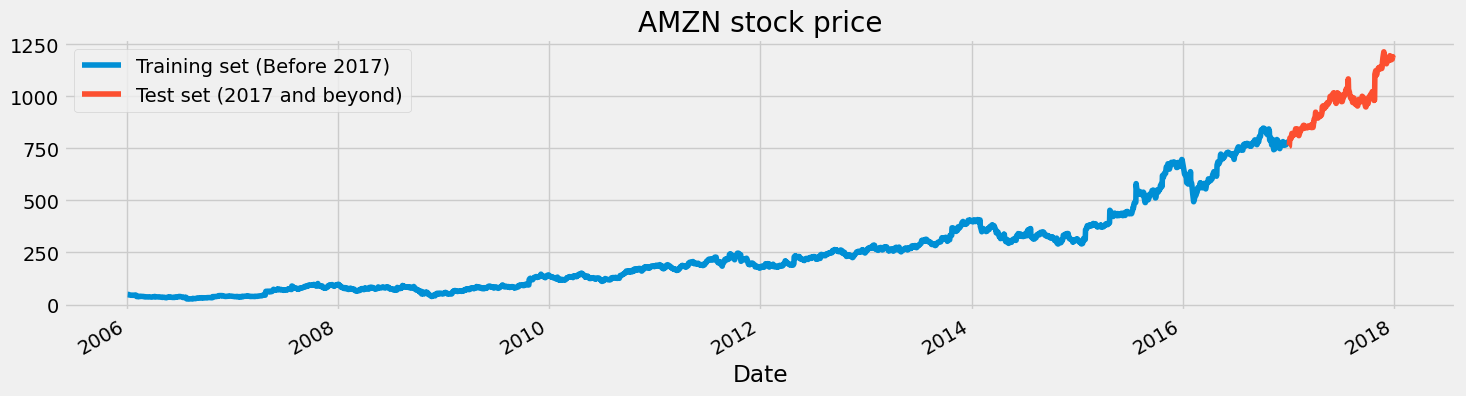

In [15]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('AMZN stock price')
plt.show()

### Write your insight in EDA here
Kita mencari dmn sebuah saham mencapa titik tertingginya dalam beberapa tahun sehingga dapat memprediksi untuk tahun berikutnya tapi sebelum itu astikan data sudah bersih dari null dan na

<Axes: xlabel='Date', ylabel='High'>

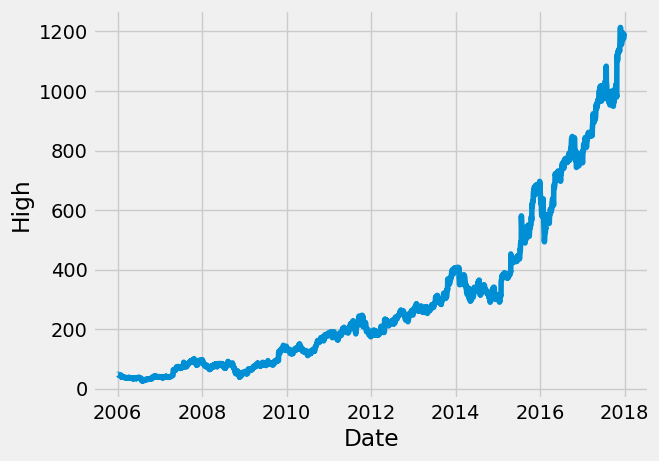

In [17]:
#Checking for stock's market company with line plot
#Write your code below

sns.lineplot(data=dataset['High'])

In [18]:
# Scaling with minmaxscaller for data train
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
#checking shape of data train
training_set_scaled.shape

(2768, 1)

In [20]:
# create data structure to fill how many row for input in your model at data train
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    #fill for x_train and y_train here

#change it into the array
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
# Reshaping X_train before modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Modelling

In [22]:
# Sequential Modelling
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer, fill the code below
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Fourth LSTM layer, fill the code below
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
# Compiling
model.compile(optimizer='rmsprop',loss='mean_squared_error')
# Train fitting for the model
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 11s 76ms/step - loss: 0.0100
Epoch 2/50
85/85 [==============================] - 6s 70ms/step - loss: 0.0043
Epoch 3/50
85/85 [==============================] - 6s 76ms/step - loss: 0.0030
Epoch 4/50
85/85 [==============================] - 6s 74ms/step - loss: 0.0031
Epoch 5/50
85/85 [==============================] - 10s 115ms/step - loss: 0.0026
Epoch 6/50
85/85 [==============================] - 8s 97ms/step - loss: 0.0021
Epoch 7/50
85/85 [==============================] - 6s 76ms/step - loss: 0.0021
Epoch 8/50
85/85 [==============================] - 6s 70ms/step - loss: 0.0021
Epoch 9/50
85/85 [==============================] - 6s 75ms/step - loss: 0.0020
Epoch 10/50
85/85 [==============================] - 6s 70ms/step - loss: 0.0017
Epoch 11/50
85/85 [==============================] - 6s 75ms/step - loss: 0.0018
Epoch 12/50
85/85 [==============================] - 6s 70ms/step - loss: 0.0018
Epoch 13/50
85/85 [===============

In [23]:
# Prepare for data test similar way for data train
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
test = dataset_total[len(dataset_total)-len(test_set) - 60:].values
test = test.reshape(-1,1)
test  = sc.transform(test)
#Transform the inputs

In [24]:
#checking data test shape
test.shape

(311, 1)

### Prediction

In [26]:
# Preparing X_test and predicting the prices of the stock's that you choose
X_test = []
for i in range(60,311):
    X_test.append(test[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Predicting stocks price
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 27ms/step


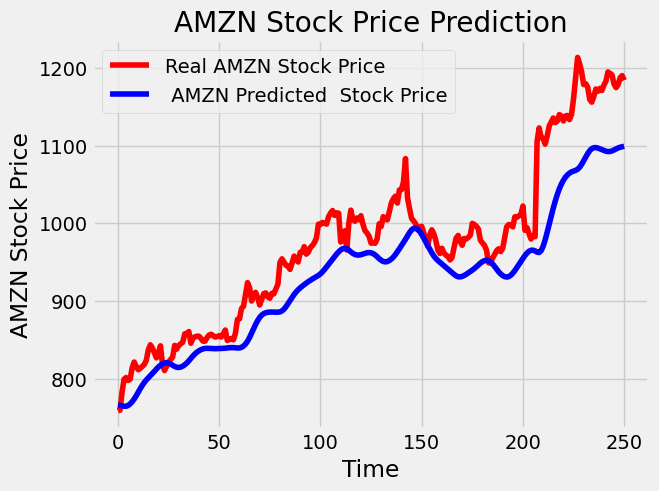

In [27]:
# Visualizing the results for prediction
prediction_plot(test_set,predicted_stock_price)

In [28]:
# Evaluating our model with RMSE function above
rmse_eval(test_set,predicted_stock_price)

The root mean squared error is 55.528353421932295.


### Write your Insight and advice here :)


Peforma RNN cukup baik tapi di akhir tidak terlalu sama persis, tapi sudah mewakili nilai realnya